In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import netCDF4 as nc
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
%matplotlib inline

In [2]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]   

In [54]:
def calc_rho(Sal, TempC, P):
    """ Calculate rho: Based on SOG code
    """
    
    # Calculate the square root of the salinities
    sqrSal = np.sqrt(Sal)

    # Calculate the density profile at the grid point depths
    # Pure water density at atmospheric pressure
    # (Bigg P.H., (1967) Br. J. Applied Physics 8 pp 521-537)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3

    # International one-atmosphere equation of state of seawater
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1

    # Specific volume at atmospheric pressure
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)

    # Density anomoly at atmospheric pressure
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    
    return rho

In [3]:
Jan04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJan0.4/SalishSea_1h_20170101_20170107_grid_T.nc')

In [4]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(Jan04.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(Jan04.variables['nav_lat'][350,:][:],1)).T])

In [5]:
mask = 1 - new_domain[:,350,:]

In [6]:
rc('animation', html='html5')

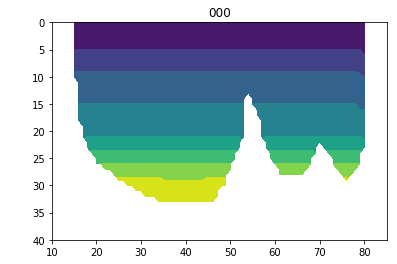

In [11]:
fig,ax = plt.subplots()

def animate2(i):
    ax.clear()
    density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [Jan04.variables['vosaline'][i,:,350,:],
                                        Jan04.variables['votemper'][i,:,350,:],
                                        pressure1])
    masked_density1 = ma.masked_array(density1, mask = mask)
    den = ax.contourf(masked_density1, levels = np.arange(1021.5, 1025.6, 0.5) #, colors='black'
            )
    ax.set_ylim((40,0))
    ax.set_xlim((10,85))
    ax.set_title('%03d'%(i)) 
    return ax

interval = 1#in seconds     
ani3 = animation.FuncAnimation(fig,animate2,frames=5,interval=interval*1e+3, repeat=False)

In [12]:
ani3

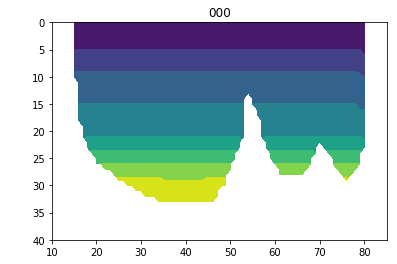

In [14]:
fig,ax = plt.subplots()

def animate3(i):
    ax.clear()
    density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [Jan04.variables['vosaline'][i,:,350,:],
                                        Jan04.variables['votemper'][i,:,350,:],
                                        pressure1])
    masked_density1 = ma.masked_array(density1, mask = mask)
    den = ax.contourf(masked_density1, levels = np.arange(1021.5, 1025.6, 0.5) #, colors='black'
            )
    ax.set_ylim((40,0))
    ax.set_xlim((10,85))
    ax.set_title('%03d'%(i)) 
    return ax

interval = 0.25#in seconds     
ani4 = animation.FuncAnimation(fig,animate2,frames=144,interval=interval*1e+3, repeat=False)

In [15]:
ani4

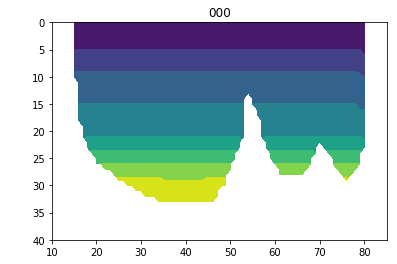

In [16]:
fig,ax = plt.subplots()

def animate4(i):
    ax.clear()
    density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [Jan04.variables['vosaline'][i,:,180,:],
                                        Jan04.variables['votemper'][i,:,180,:],
                                        pressure1])
    masked_density1 = ma.masked_array(density1, mask = mask)
    den = ax.contourf(masked_density1, levels = np.arange(1021.5, 1025.6, 0.5) #, colors='black'
            )
    ax.set_ylim((40,0))
    ax.set_xlim((75,258))
    ax.set_title('%03d'%(i)) 
    return ax

interval = 0.25#in seconds     
ani5 = animation.FuncAnimation(fig,animate2,frames=144,interval=interval*1e+3, repeat=False)

In [17]:
ani5

In [24]:
mask2 = 1 - new_domain[:,180,:]

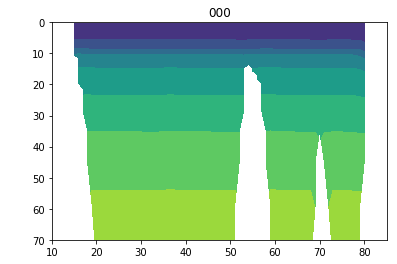

In [109]:
fig,ax = plt.subplots()
deptht = Jan04.variables['deptht'][:]
def animate20(i):
    ax.clear()
    density1 = calc_rho(Jan04.variables['vosaline'][i,:,350,:],
                                        Jan04.variables['votemper'][i,:,350,:],
                                        pressure1)
    masked_density1 = ma.masked_array(density1, mask = mask)
    den = ax.contourf(np.arange(0,284), deptht, masked_density1, 
                      levels = np.linspace(1021.5, 1024.5, 11) #, colors='black'
            )
    ax.set_ylim((70,0))
    ax.set_xlim((10,85))
    ax.set_title('%03d'%(i)) 
    return ax

interval = 0.25#in seconds     
ani30 = animation.FuncAnimation(fig,animate20,frames=144,interval=interval*1e+3, repeat=False)

In [110]:
ani30